In [261]:
import nflreadpy as nfl
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 1) load.py

# 2) preprocessing.py

In [262]:
# import play by play data from /data/
pbp_filepath = '../../data/raw_pbp.csv'

try:
    df = pd.read_csv(pbp_filepath)
except Exception as e:
    print(f'Error: {e}')

/var/folders/xn/wkvzqh111pj3tm8j06w408240000gn/T/ipykernel_23775/1463136162.py:5: DtypeWarning: Columns (46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,219,220,221,223,225,227,234,235,236,237,238,239,244,245,246,254,255,256,261,263,264,284,285,303,333) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pbp_filepath)


### What are we working with?
- Let's take a general look at the features
- What do we need for our model?

In [263]:
df.head(1)

,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,

In [264]:
# features we have to choose from
print(f'Number of features: {len(df.columns)}')
for col in df.columns:
    print(col)

Number of features: 373
Unnamed: 0
play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa


In [265]:
# general feature trim to remove unrelated features (e.g. probabilities, post play features, etc)
# before actual feature selection
cols_to_keep = [
    "yardline_100", # Numeric distance in the number of yards from the opponent's endzone for the posteam.
    "posteam", # String abbreviation for the team with possession.
    "quarter_seconds_remaining",
    "half_seconds_remaining",
    "game_seconds_remaining",
    "game_half", # String indicating which half the play is in, either Half1, Half2, or Overtime.
    "drive", # Numeric drive number in the game.
    "qtr", # Quarter of the game (5 is overtime).
    "down", 
    "goal_to_go", # Binary indicator for whether or not the posteam is in a goal down situation.
    "time", # Time at start of play provided in string format as minutes:seconds remaining in the quarter.
    "ydstogo",
    "play_type",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining",
    "posteam_score",
    "defteam_score",
    "score_differential", # Score differential between the posteam and defteam at the start of the play.
    "ep", # estimated expected points with respect to the possession team for the given play.
    "posteam_type", # String indicating whether the posteam team is home or away
    "wp" # Estimated win probabiity for the posteam given the current situation at the start of the given play
]

df = df[cols_to_keep]

In [266]:
print(f'Rows in dataframe: {len(df)}\n')
print(f'{df.info()}')

Rows in dataframe: 242329

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242329 entries, 0 to 242328
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   yardline_100                225048 non-null  float64
 1   posteam                     229081 non-null  object 
 2   quarter_seconds_remaining   242311 non-null  float64
 3   half_seconds_remaining      242311 non-null  float64
 4   game_seconds_remaining      242311 non-null  float64
 5   game_half                   242329 non-null  object 
 6   drive                       239562 non-null  float64
 7   qtr                         242329 non-null  float64
 8   down                        203520 non-null  float64
 9   goal_to_go                  242329 non-null  int64  
 10  time                        242311 non-null  object 
 11  ydstogo                     242329 non-null  float64
 12  play_type                   235199 non-null  

In [267]:
print(f'Value Counts for play_type:\n{df.play_type.value_counts()}')

# ensure our data only contains passing and run plays
print('\nTrimming to only contain pass and run plays...')
df = df[df['play_type'].isin(['pass', 'run'])]


Value Counts for play_type:
pass           99828
run            73063
no_play        23082
kickoff        14170
punt           10764
extra_point     6321
field_goal      5469
qb_kneel        2150
qb_spike         352
Name: play_type, dtype: int64

Trimming to only contain pass and run plays...


In [268]:
# what features contain null values?
print('\nNull Values:')
print(df.isnull().sum())


Null Values:
yardline_100                    0
posteam                         0
quarter_seconds_remaining       0
half_seconds_remaining          0
game_seconds_remaining          0
game_half                       0
drive                          29
qtr                             0
down                          673
goal_to_go                      0
time                            0
ydstogo                         0
play_type                       0
posteam_timeouts_remaining      0
defteam_timeouts_remaining      0
posteam_score                   0
defteam_score                   0
score_differential              0
ep                              0
posteam_type                    0
wp                              0
dtype: int64


In [269]:
# plays are extremely unique due to having 100+ features
# we will still check for duplicates incase the api being used has errors.
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 394


### Data Cleaning
- Dropping rows containing nulls
- Removing duplicates
- Removing outliers (garbage time)
- Renaming columns for clarity

In [270]:
# dropping null rows
df_cleaned = df.dropna(axis=0)

# dropping duplicates
df_cleaned = df_cleaned.drop_duplicates()


/var/folders/xn/wkvzqh111pj3tm8j06w408240000gn/T/ipykernel_23775/2045988547.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[((df['wp'] > 0.1) & (df['wp'] < 0.9))]


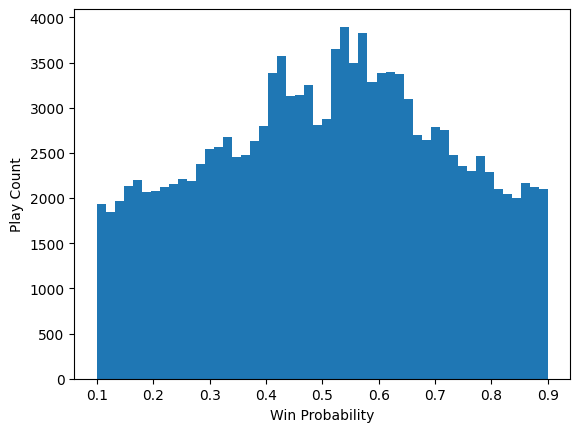

In [271]:
import matplotlib.pyplot as plt

# removing garbage time
# teams get desperate during this time and call plays they wouldn't usually call
# how should we define it?

# option 1 manually define it
# df_cleaned['garbage_time'] = (
#     # final 2 min of 1st half
#     ((df['qtr'] == 2) & (df['half_seconds_remaining'] <= 120)) |

#     # trailing in the 4th qtr
#     ((df['qtr'] == 4) & (df['score_differential'] > 0)) |

#     # down by 21+ at any time
#     (df['score_differential'] < -21) | 

#     # up by 21+ in the 2nd hald
#     ((df['qtr'] >= 3) & (df['score_differential'] >= 21))
# )

# df_cleaned = df_cleaned.loc[~df_cleaned['garbage_time']].reset_index(drop=True)

# option 2
# where win probability is btw 0.1 and 0.9
df_cleaned = df_cleaned[((df['wp'] > 0.1) & (df['wp'] < 0.9))]

plt.hist(df_cleaned.wp, bins=50)
plt.ylabel('Play Count')
plt.xlabel('Win Probability')
plt.show()


In [272]:
print(f'Length before cleaning {len(df)}')
print(f'Length after cleaning {len(df_cleaned)}')

print(f'Pass/Run Split:\n{df_cleaned.play_type.value_counts()}')

Length before cleaning 172891
Length after cleaning 132295
Pass/Run Split:
pass    76072
run     56223
Name: play_type, dtype: int64


### Feature Engineering
- Derive new features
- One-hot/ multi-hot encoding categorical variables

In [273]:
# convert our binary string categorical features to binary numbers
df_cleaned['play_type'] = df_cleaned['play_type'].map({'run': 0, 'pass': 1})
df_cleaned['posteam_type'] = df_cleaned['posteam_type'].map({'away': 0, 'home': 1})


# encoding
# we'll need to one-hot encode the categorical variables within our data
# should "down" be encoded? for logistic regression yes, for gradient boosting it isn't necessary
df_cleaned['down'] = df_cleaned['down'].astype('int64')
df_cleaned = pd.get_dummies(df_cleaned, columns=['down'], prefix='down', drop_first=True)

df_cleaned.head(1)

,yardline_100,posteam,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,drive,qtr,goal_to_go,time,ydstogo,play_type,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,ep,posteam_type,wp,down_2,down_3,down_4
2,75.0,TEN,900.0,1800.0,3600.0,Half1,1.0,1.0,0,15:00,10.0,0,3.0,3.0,0.0,0.0,0.0,1.474098,1,0.546262,0,0,0


### Feature Selection
There will be two sets of features for two different uses

1) The first set will be for interactive application in which a user can input
a customized situation to determine whether a team will run or pass

2) The second set will be used to real world analysis of NFL play to determine how effective the model is on real time data.

In [274]:
# application set
model_features = ['ydstogo', 'yardline_100', 'score_differential', 
                  'qtr', 'quarter_seconds_remaining', 'posteam_type','down_2', 'down_3', 'down_4', 'play_type']

# real world analysis set
model_features_real_world = None

df_final = df_cleaned[model_features]
df_final = df_final.reset_index(drop=True)

print(f'Null Values (should be 0):\n{df_final.isnull().sum()}')

df_test = df_final.head(1000)


Null Values (should be 0):
ydstogo                      0
yardline_100                 0
score_differential           0
qtr                          0
quarter_seconds_remaining    0
posteam_type                 0
down_2                       0
down_3                       0
down_4                       0
play_type                    0
dtype: int64


# 3) train.py

split -> scale -> balance classes -> select model -> fit model -> predict

In [275]:
import pandas as pd
import pickle
import numpy
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Model Training
- Logisitic Regression
- Gradient Boosting (LightGBM)

Feature Selection

In [ ]:
final_features = ['ydstogo', 'yardline_100', 'score_differential', 
                  'qtr', 'quarter_seconds_remaining', 'posteam_type','down_2', 'down_3', 'down_4']

X = df_test[final_features]
Y = df_test['play_type']
['play_type']

# data is imbalanced 76k pass vs 56k run
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.2,
    random_state=46,
    stratify=Y)

model = LogisticRegression(class_weight='balanced', n_jobs=-1)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/Users/ethanwilson/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


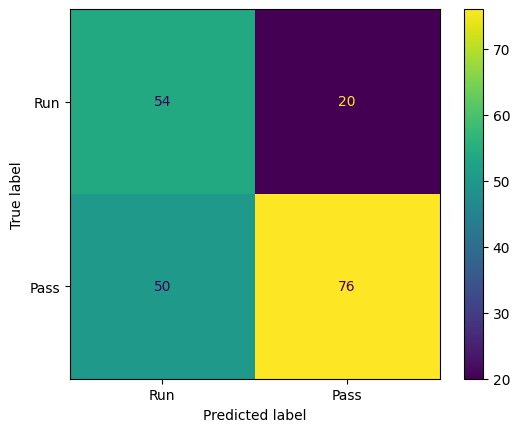

In [280]:
cm = confusion_matrix(Y_test, y_pred)

cm_visual = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Run', 'Pass'])
cm_visual.plot()
plt.show()